# Inactive 90+ Days

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
inactive=pd.read_excel('inactive_90+.xlsx')

In [3]:
bid_ytd=pd.read_csv('bid_ytd.csv')

bid_2020=pd.read_csv('2020auctionbids.csv')

In [4]:
all_stock=pd.read_csv('all_stock.csv')
all_stock['submitted_date']=pd.to_datetime(all_stock['submitted_date'])

In [5]:
bid_2020['buyer']=bid_2020['buyer'].str.lower()

In [6]:
# merge bidding
all_bid=bid_ytd.merge(bid_2020, how='outer')

# result
all_bid['win']='N'
all_bid.loc[all_bid['bid']>=all_bid['winning_price'], 'win']='Y'

# within 10 percent
all_bid['within_10']='N'
all_bid.loc[(all_bid['bid'])>(all_bid['winning_price']*.9), 'within_10']='Y'

In [7]:
all_bid['bid_placed_on']=pd.to_datetime(all_bid['bid_placed_on'])

In [8]:
stage=pd.read_csv('new_stage.csv')
email=pd.read_csv('buyer_emails.csv')

In [9]:
email['email']=email['email'].astype(str).str.lower()
email['username']=email['username'].astype(str).str.lower()

email.head()

,user_id,username,email,first_purchase_date
0,201448,2ndchanceresaleoh,hollylaz@yahoo.com,7/10/19
1,201076,absolutelyherstore,info@absolutelyherstore.com,5/22/19
2,203516,addiction studios,info@addictionstudios.com,9/10/19
3,200853,adore the couture,info@adorethecouture.com,5/1/19
4,200491,agents in style,rhoda@agentsinstyle.com,6/8/20


In [10]:
new=pd.merge(inactive, email, left_on='buyer', right_on='username', how='left')
new=new.drop(columns=['username'])
new.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent,user_id,email,first_purchase_date
0,agora vintage,34798.0,0.0,34798.0,2021-01-25,N,NaT,N,NaT,0,0,NaN,0,0,207275.0,agoravintage@gmail.com,3/30/20
1,revolve,31819.0,0.0,31819.0,2020-08-13,N,NaT,N,NaT,0,0,NaN,0,0,207173.0,merissa.ghezzi@revolve.com,7/29/20
2,dlc,11906.0,18541.0,30447.0,2020-08-25,N,2020-08-31,N,2020-08-28,59,388,15.206186,9,55,194484.0,srd4181@gmail.com,5/6/20
3,uptown bombshell boutique,2748.0,26708.0,29456.0,2020-06-03,N,2020-08-02,N,2020-06-28,25,175,14.285714,15,36,210034.0,uptownbombshellboutique@gmail.com,6/3/20
4,fox & holly,26575.0,0.0,26575.0,2020-10-20,N,NaT,N,NaT,0,0,NaN,0,0,212796.0,sg@laceemail.com,9/22/20


In [11]:
# new.to_excel('new_inactive_90+.xlsx')

In [12]:
new[['last_bid', 'last_stock', 'last_win', 'first_purchase_date']]=(new[['last_bid', 'last_stock', 'last_win', 'first_purchase_date']]
                                                                    .apply(pd.to_datetime))

In [13]:
new['last_activity']=new[['last_stock','last_bid']].max(axis=1)
new['time_to_inactive']=(new['last_activity']-new['first_purchase_date']).dt.days

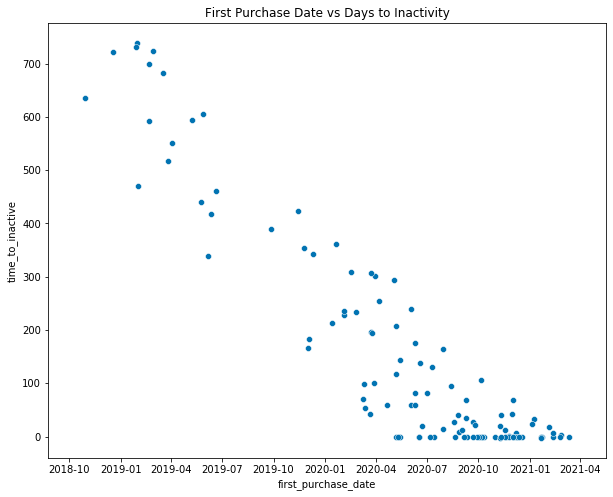

In [14]:
plt.figure(figsize=(10,8))
sns.set_palette('colorblind')
sns.scatterplot(x='first_purchase_date', y='time_to_inactive', data=new)
plt.title('First Purchase Date vs Days to Inactivity')
plt.show()

* Not trending well; people who have signed up between end of 2020 and beginning of 2021 have had shorter account lifespans
* Number of days between sign up and inactivity has decreased

In [15]:
new[new['first_purchase_date']>datetime.datetime(2020,1,1)]['time_to_inactive'].mean()

65.53333333333333

## BIDDERS ONLY WHO NEVER CAME BACK

In [16]:
new.loc[new['last_stock'].isnull(), 'tag']=0
bid_bye=new.loc[new['last_stock'].isnull()]
bid_bye.sort_values(by='total_bids',ascending=False).head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent,user_id,email,first_purchase_date,last_activity,time_to_inactive,tag
14,lily messan,0.0,8320.0,8320.0,NaT,N,2020-09-20,N,2020-09-18,27,511,5.283757,7,79,206691.0,messanlily@yahoo.fr,2020-02-04,2020-09-20,229.0,0.0
38,golden bear boutique,0.0,2733.0,2733.0,NaT,N,2021-01-19,N,2020-11-09,11,269,4.089219,3,24,213112.0,worldwidedanli@yahoo.com,2020-10-05,2021-01-19,106.0,0.0
22,sammie the stylist,0.0,5049.0,5049.0,NaT,N,2020-10-04,N,2020-06-13,5,258,1.937984,3,8,209178.0,sammiethestylist@gmail.com,2020-05-14,2020-10-04,143.0,0.0
139,the purse ladies,NaN,NaN,NaN,NaT,N,2020-05-16,N,NaT,0,75,NaN,0,2,205258.0,alana@thepurseladies.com,2019-12-02,2020-05-16,166.0,0.0
117,dealated miami,NaN,NaN,NaN,NaT,N,2020-12-21,N,NaT,0,51,NaN,0,2,206785.0,hlawner@aol.com,2020-02-17,2020-12-21,308.0,0.0


TAG 0: Bidders who never came back

In [17]:
# bid_bye.to_excel('bid_bye.xlsx')

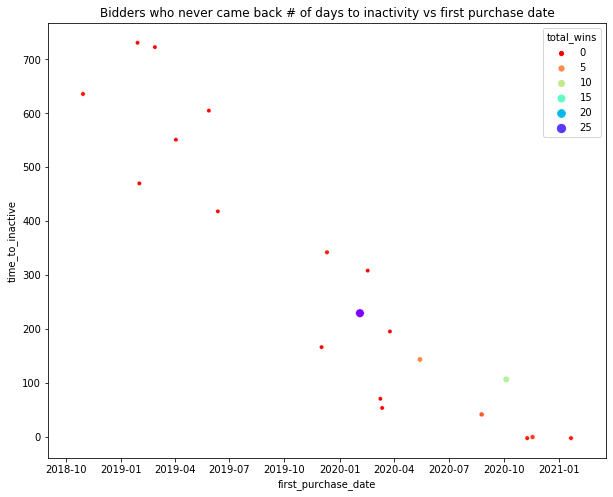

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='first_purchase_date', y='time_to_inactive', data=bid_bye, hue='total_wins', size='total_wins', palette='rainbow_r')
plt.title('Bidders who never came back # of days to inactivity vs first purchase date')
plt.show()

In [19]:
bid_bye[(bid_bye['first_purchase_date']>datetime.datetime(2020,1,1))]['time_to_inactive'].mean()

103.45454545454545

In [20]:
bid_bye[bid_bye['total_wins']>0]['time_to_inactive'].mean()

165.55555555555554

In [21]:
lm=all_bid[all_bid['buyer']=='lily messan']
gb=all_bid[all_bid['buyer']=='golden bear boutique']

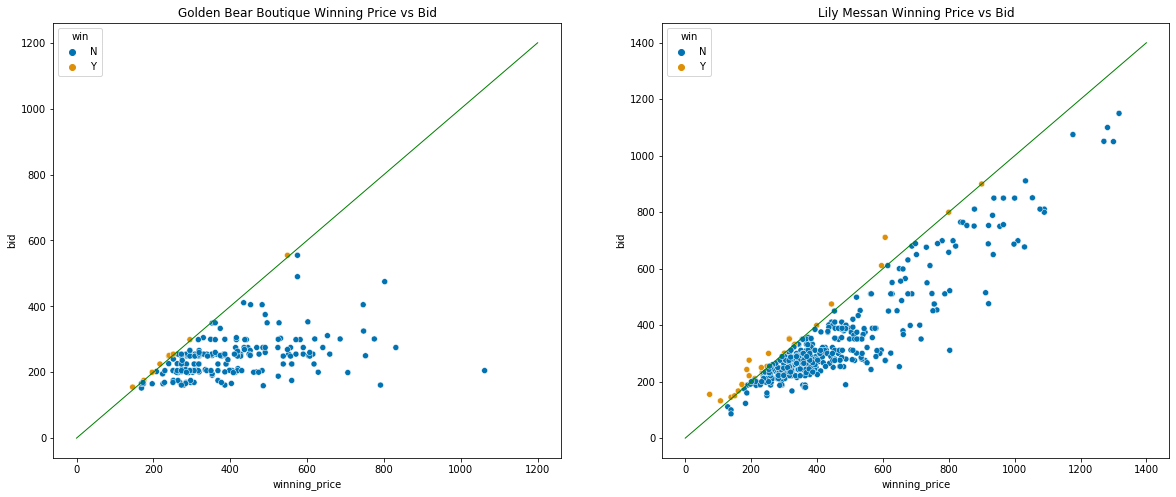

In [22]:
fig,axes=plt.subplots(1,2, figsize=(20,8))
ax1=sns.scatterplot(x='winning_price', y='bid', data=lm, hue='win', ax=axes[1])
plt.plot([1400, 0], [1400, 0], linewidth=1, color='green')
plt.title('Lily Messan Winning Price vs Bid')

ax2=sns.scatterplot(x='winning_price', y='bid', data=gb, hue='win', ax=axes[0])
ax2.set(title='Golden Bear Boutique Winning Price vs Bid')
ax2.plot([1200, 0], [1200, 0], linewidth=1, color='green')
plt.show()

In [23]:
print('golden bear boutique win rate: {:.2f}%'.format(list(bid_bye[bid_bye['buyer']=='golden bear boutique']['win_rate'])[0]))
print('lily messan win rate: {:.2f}%'.format(list(bid_bye[bid_bye['buyer']=='lily messan']['win_rate'])[0]))

golden bear boutique win rate: 4.09%
lily messan win rate: 5.28%


* Both of these buyers had the highest number of wins for this segment, but very low win rates.
* These two graphs show that these buyers could use some coaching in terms of bidding; it is clear that they try in auction but are often outside of 10% of the winning price.
* GBB last activity 1/21 and LM last activity 9/20

In [24]:
no_win=(bid_bye[bid_bye['total_wins']==0][['buyer', 'total_bids', 'last_activity', 'first_purchase_date']]
 .sort_values(by='total_bids', ascending=False).reset_index(drop=True))
nowin_list=list(no_win['buyer'][:5])

no_win[:10]

,buyer,total_bids,last_activity,first_purchase_date
0,the purse ladies,75,2020-05-16,2019-12-02
1,dealated miami,51,2020-12-21,2020-02-17
2,encore on main,30,2021-01-22,2019-05-28
3,tony,30,2020-08-23,NaT
4,bellissima consignment boutique,26,2020-09-26,NaT
5,lux918,25,2020-10-05,2019-04-03
6,caroline's luxury corner,19,2020-05-09,NaT
7,pampered n loved,18,2020-11-07,NaT
8,another basement,17,2020-06-12,NaT
9,mare,13,2020-07-26,NaT


* The buyers above are those who have only bidded but NEVER won; and then gave up
* Buyers to note are the ones listed above with over 25 total bids

In [25]:
nowin_bid=all_bid[all_bid['buyer'].isin(nowin_list)]

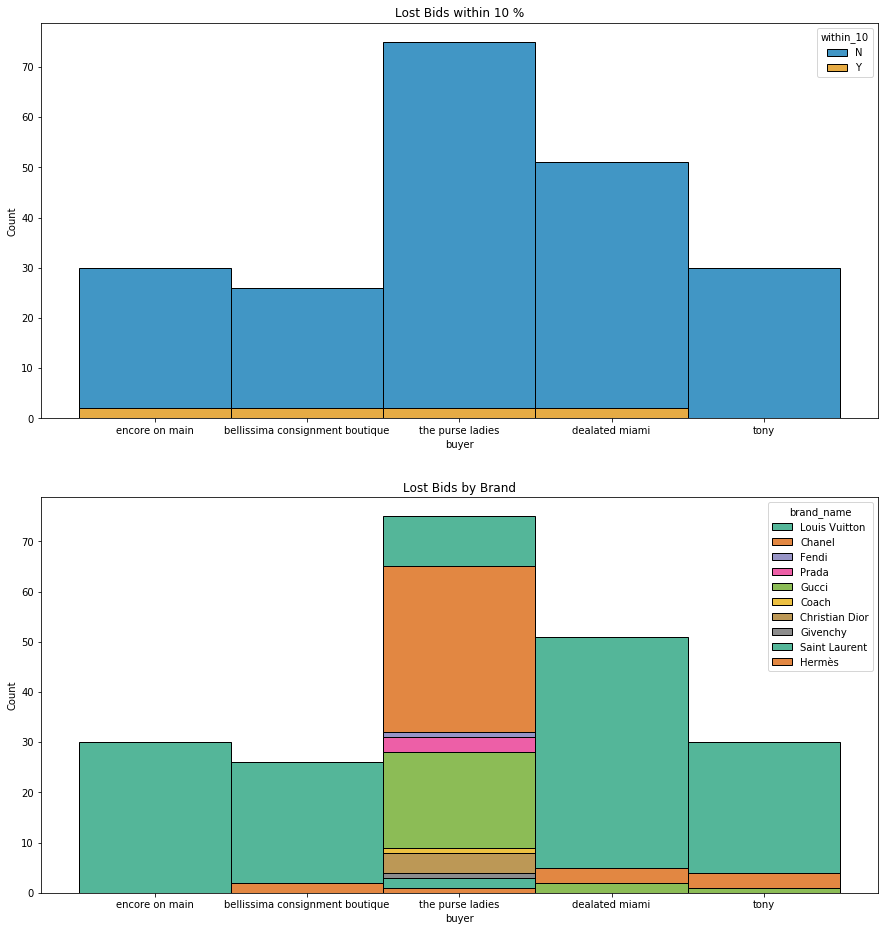

In [26]:
fig,axes=plt.subplots(2,1,figsize=(15,16))

ax1=sns.histplot(x='buyer', data=nowin_bid, hue='within_10', multiple='stack', ax=axes[0])
ax1.set(title='Lost Bids within 10 %')

ax2=sns.histplot(x='buyer', data=nowin_bid, hue='brand_name', multiple='stack', ax=axes[1], palette='Dark2')
ax2.set(title='Lost Bids by Brand')

plt.show()

In [27]:
nowin_items=nowin_bid.groupby(['buyer', 'title', 'within_10'])['bid'].count().reset_index()
nowin_items[nowin_items['buyer']=='the purse ladies'].sort_values(by='bid', ascending=False)

,buyer,title,within_10,bid
170,the purse ladies,Vintage earrings,N,3
110,the purse ladies,CHANEL logo ring,N,2
162,the purse ladies,Matrice (precious metal) earrings,N,2
103,the purse ladies,Chanel Mini Matelasse Ram leather Single flap...,N,1
148,the purse ladies,Gucci GG Supreme Shoulder bag Grey,N,1
...,...,...,...,...
133,the purse ladies,Fendi Zucchino Canvas & leather Tote bag Pink ...,N,1
134,the purse ladies,Florentine,N,1
135,the purse ladies,Gucci GG Canvas Shoulder bag Beige 388704,N,1
136,the purse ladies,Gucci GG Canvas Shoulder bag Beige 388926,N,1


In [28]:
nowin_bid.groupby('buyer')['title'].value_counts()[150:200]

buyer             title                                                                 
the purse ladies  Gucci GG Supreme Shoulder bag Grey                                        1
                  Gucci Interlocking G Leather 2WAY Handbag Black                           1
                  Gucci Ophidia Leather Shoulder bag Black 517350                           1
                  Gucci Soho Leather Shoulder bag Pink 308364                               1
                  Gucci Soho Leather Shoulder bag Purple                                    1
                  Kelly bangle                                                              1
                  Louis Vuitton Damier Knightsbridge N51201                                 1
                  Louis Vuitton Monogram Drouot M51290 LM0025                               1
                  Louis Vuitton Monogram Papillon 26 M51386                                 1
                  Louis Vuitton Monogram Vavin PM M51172 SN1012  

* All of these bidders bid tend to bid outside of 10%
* Could use some guidance in an effort to reengage

In [29]:
bb_buyers=list(bid_bye['buyer'])

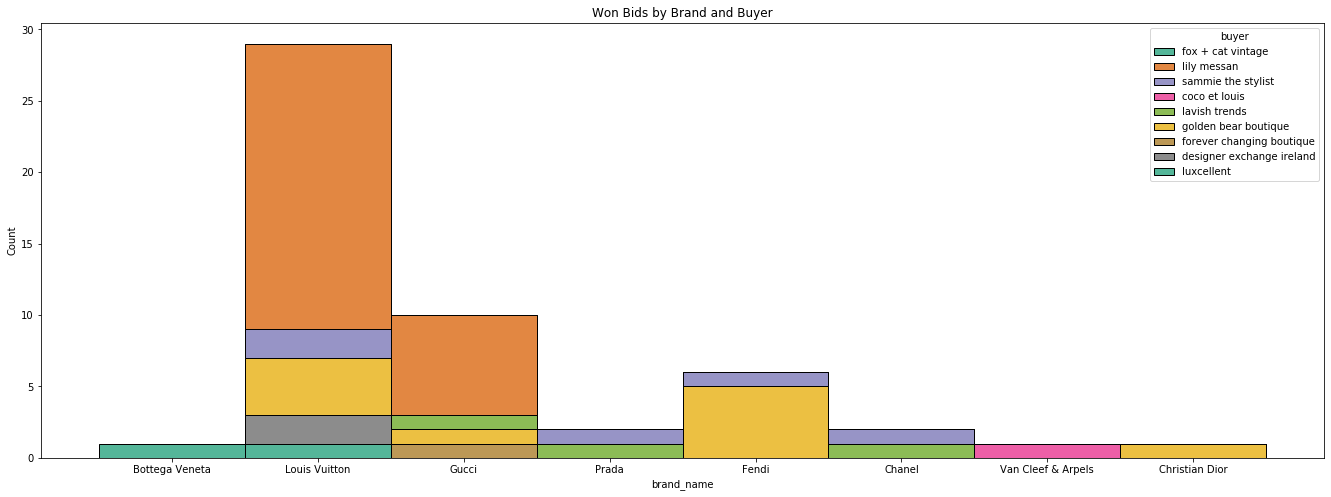

In [30]:
won_bb=all_bid[(all_bid['buyer'].isin(bb_buyers))&(all_bid['win']=='Y')]

plt.figure(figsize=(23,8))
sns.histplot(x='brand_name', data=won_bb, hue='buyer', multiple='stack', palette='Dark2')
plt.title('Won Bids by Brand and Buyer')

plt.show()

In [31]:
won_bb.groupby('buyer')['title'].value_counts()

buyer                      title                                                                       
coco et louis              No Stone Warranty Pt950 Infinet Etoile Ring 4.5g #47                            1
designer exchange ireland  Louis Vuitton Speedy 30, Damier Azur                                            1
                           Louis Vuitton Speedy 35, Monogram                                               1
forever changing boutique  323660 2WAY shoulder                                                            1
fox + cat vintage          Bottega Veneta Intrecciato Leather Chain shoulder bag Blue with mirror          1
golden bear boutique       Zucca (bag) / handbag                                                           4
                           Louis Vuitton Monogram Pochette OM M51795 MI873                                 1
                           Neverfull MM                                                                    1
                        

## BIDDERS WHO SWITCHED TO STOCK

In [32]:
new.loc[new['last_stock']>new['last_bid'], 'tag']=1
bid_tostock=new.loc[new['last_stock']>new['last_bid']]
bid_tostock.sort_values(by='total_bids', ascending=False).head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent,user_id,email,first_purchase_date,last_activity,time_to_inactive,tag
12,shoprosejp,6608.0,3078.0,9686.0,2021-01-09,N,2020-12-11,N,2020-09-14,8,208,3.846154,1,25,204639.0,rosejpconsignment@gmail.com,2019-11-13,2021-01-09,423.0,1.0
13,we do vintage,7721.0,799.0,8520.0,2020-10-13,N,2020-09-25,N,2020-09-15,2,100,2.000000,1,3,212596.0,kontakt@wedovintage.dk,2020-09-09,2020-10-13,34.0,1.0
51,luxury love,1512.0,0.0,1512.0,2020-10-16,N,2020-10-12,N,NaT,0,52,NaN,0,1,206793.0,luxurylovecompany@gmail.com,2020-02-25,2020-10-16,234.0,1.0
5,hailey diane luxury resale,18497.0,861.0,19358.0,2020-11-03,N,2020-10-10,N,2020-10-01,2,45,4.444444,1,5,210259.0,contact@haileydianeluxuryresale.com,2020-06-18,2020-11-03,138.0,1.0
79,nu2ucf,605.0,0.0,605.0,2021-01-28,N,2020-10-20,N,NaT,0,45,NaN,0,1,197047.0,nu2ucf@gmail.com,2019-03-17,2021-01-28,683.0,1.0


TAG 1: Bidders who switched to stock

In [33]:
bid_tostock['time_between']=(bid_tostock['last_stock']-bid_tostock['last_bid']).dt.days

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
bid_tostock

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,...,win_rate,wins_on_multi_bid,bids_within_10_percent,user_id,email,first_purchase_date,last_activity,time_to_inactive,tag,time_between
5,hailey diane luxury resale,18497.0,861.0,19358.0,2020-11-03,N,2020-10-10,N,2020-10-01,2,...,4.444444,1,5,210259.0,contact@haileydianeluxuryresale.com,2020-06-18,2020-11-03,138.0,1.0,24
6,byrd designer consignment boutique,18388.0,0.0,18388.0,2020-12-10,N,2020-10-26,N,NaT,0,...,NaN,0,0,2913.0,emily@byrdstyle.com,2018-12-19,2020-12-10,722.0,1.0,45
8,lxy boutique,10958.0,0.0,10958.0,2020-12-17,N,2020-08-30,N,NaT,0,...,NaN,0,3,207951.0,info@lxyboutique.com,2020-04-07,2020-12-17,254.0,1.0,109
10,luxurylabels,10412.0,0.0,10412.0,2020-07-07,N,2020-06-12,N,NaT,0,...,NaN,0,0,135233.0,info@shopluxurylabels.com,2020-03-28,2020-07-07,101.0,1.0,25
12,shoprosejp,6608.0,3078.0,9686.0,2021-01-09,N,2020-12-11,N,2020-09-14,8,...,3.846154,1,25,204639.0,rosejpconsignment@gmail.com,2019-11-13,2021-01-09,423.0,1.0,29
13,we do vintage,7721.0,799.0,8520.0,2020-10-13,N,2020-09-25,N,2020-09-15,2,...,2.000000,1,3,212596.0,kontakt@wedovintage.dk,2020-09-09,2020-10-13,34.0,1.0,18
15,nh timeless designers,7456.0,286.0,7742.0,2021-01-24,N,2020-06-20,N,2020-06-20,1,...,20.000000,0,1,207524.0,nohaglam@gmail.com,2020-03-24,2021-01-24,306.0,1.0,218
18,monalisa_creations,5848.0,0.0,5848.0,2021-02-21,N,2020-08-12,N,NaT,0,...,NaN,0,3,148528.0,lhyams@gmail.com,2020-05-04,2021-02-21,293.0,1.0,193
26,styleonlafayette,4163.0,0.0,4163.0,2020-12-22,N,2020-10-20,N,NaT,0,...,NaN,0,0,200905.0,styleonlafayette@gmail.com,2019-05-08,2020-12-22,594.0,1.0,63
29,hello gorgeous pa,3669.0,0.0,3669.0,2020-11-26,N,2020-11-16,N,NaT,0,...,NaN,0,0,154827.0,miranda@hellogorgeouscg.com,2020-11-25,2020-11-26,1.0,1.0,10


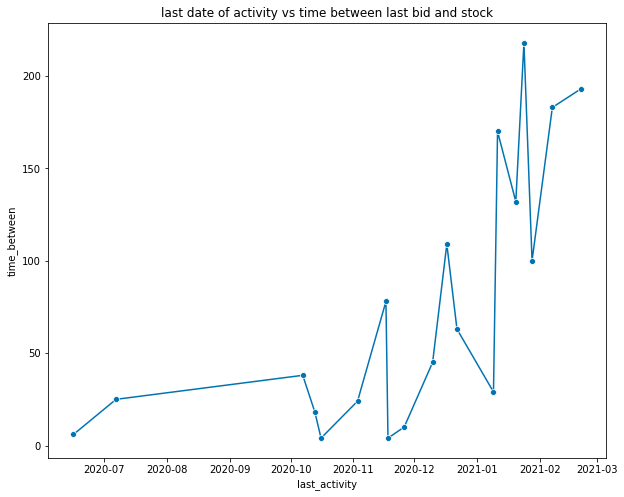

In [35]:
plt.figure(figsize=(10,8))
sns.lineplot(x=bid_tostock['last_activity'], y=bid_tostock['time_between'], marker='o')
plt.title('last date of activity vs time between last bid and stock')
plt.show()

In [36]:
# bid_tostock.to_excel('bid_to_stock.xlsx')

In [37]:
bidtostock_list=list(bid_tostock['buyer'])

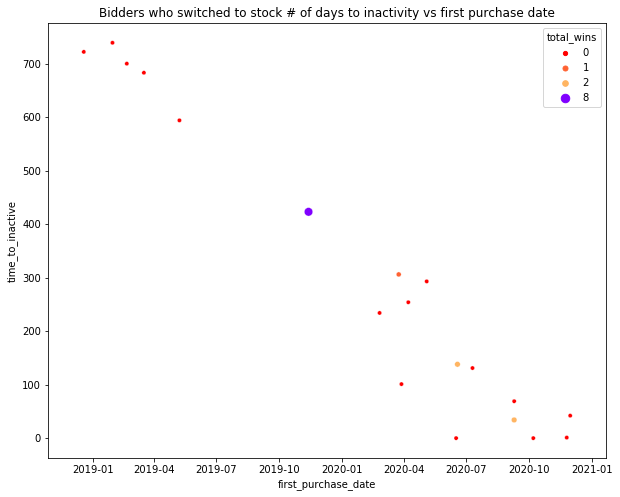

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='first_purchase_date', y='time_to_inactive', data=bid_tostock, hue='total_wins', size='total_wins', palette='rainbow_r')
plt.title('Bidders who switched to stock # of days to inactivity vs first purchase date')
plt.show()

In [39]:
bid_tostock[bid_tostock['first_purchase_date']>datetime.datetime(2020,1,1)]['time_to_inactive'].mean()

123.3076923076923

In [40]:
bidtostock_bid=all_bid[all_bid['buyer'].isin(bidtostock_list)]

print('the average bid for this segment: ${:.2f}'.format(bidtostock_bid['bid'].mean()))

the average bid for this segment: $426.46


In [41]:
bidtostock_stock=all_stock[all_stock['buyer'].isin(bidtostock_list)]

In [42]:
bidtostock_bid.groupby('buyer')['title'].value_counts()[:50]

buyer                               title                                                                          
ashden house boutique               388930 Unused shoulder bag                                                         1
                                    547586 Vintage logo Bi-fold wallet Unused                                          1
                                    Accessories/Belts/Belt Check Pattern Beige/Black Size 90 Boxes                     1
                                    Blaster clutch bag unused                                                          1
                                    Burberry Waist Bag Unused storage items                                            1
                                    Constance H Belt □J 85cm                                                           1
                                    Etui Voyage MM                                                                     1
                                    E

In [43]:
bidtostock_stock.groupby('buyer')['title'].value_counts()[:50]

buyer                               title                                                          
ashden house boutique               GUCCI Wallet Wallet Calf                                           1
                                    MCM Backpack Others Nylon                                          1
                                    Saint Laurent City Backpack  Canvas                                1
brighter bag                        Louis Vuitton Speedy 35, Monogram                                  1
byrd designer consignment boutique  CHANEL Shoulder Tote Shoulder Bag Nylon                            1
                                    Christian Dior Trotter Clutch Bag Blue                             1
                                    Fendi Pink Canvas Fabric Zucchino Tote Bag  W/ Pouch               1
                                    Ferragamo Gancini Shoulder Bag Black                               1
                                    GUCCI GG Canvas Leather 

In [44]:
top5=list(bidtostock_bid['brand_name'].value_counts().index[:5])

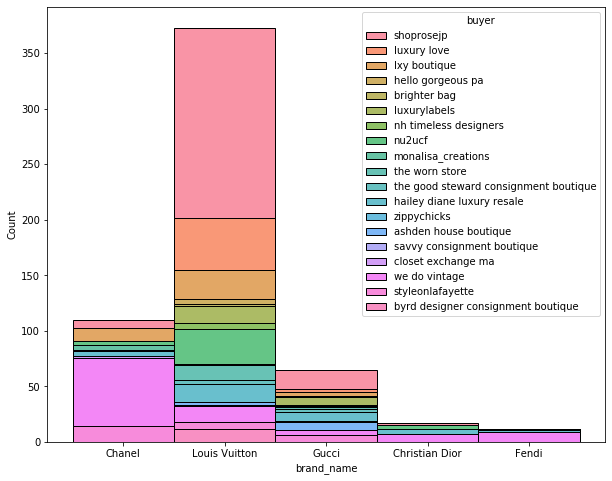

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=bidtostock_bid[bidtostock_bid['brand_name'].isin(top5)], hue='buyer', multiple='stack')
plt.show()

In [46]:
brand_cat=(bidtostock_bid.groupby(['buyer','brand_name'])['category_name'].value_counts().rename('count').reset_index())
brand_cat

,buyer,brand_name,category_name,count
0,ashden house boutique,Balenciaga,Backpacks,1
1,ashden house boutique,Burberry,Crossbody Bags,2
2,ashden house boutique,Burberry,Belts,1
3,ashden house boutique,Christian Louboutin,Clutches,1
4,ashden house boutique,Ferragamo,Shoulder Bags,1
...,...,...,...,...
146,we do vintage,Louis Vuitton,Shoulder Bags,11
147,we do vintage,Louis Vuitton,Totes,2
148,we do vintage,Louis Vuitton,Crossbody Bags,1
149,we do vintage,Yves Saint Laurent,Shoulder Bags,1


In [47]:
win=bid_tostock[bid_tostock['total_wins']>0]

In [48]:
brand_cat_s=(bidtostock_stock.groupby(['buyer','brand_name'])['category_name']
             .value_counts()
             .rename('count')
             .reset_index())
brand_cat_s[brand_cat_s['buyer'].isin(list(win['buyer']))][:60]

,buyer,brand_name,category_name,count
24,hailey diane luxury resale,Burberry,Handbags,2
25,hailey diane luxury resale,Burberry,Shoulder Bags,2
26,hailey diane luxury resale,Chanel,Wallets,2
27,hailey diane luxury resale,Chanel,Clutches,1
28,hailey diane luxury resale,Chanel,Earrings,1
29,hailey diane luxury resale,Chanel,Shoulder Bags,1
30,hailey diane luxury resale,Chanel,Totes,1
31,hailey diane luxury resale,Christian Dior,Wallets,2
32,hailey diane luxury resale,Christian Dior,Clutches,1
33,hailey diane luxury resale,Christian Dior,Handbags,1


In [49]:
brand_cat[brand_cat['buyer'].isin(list(win['buyer']))][:60]

,buyer,brand_name,category_name,count
17,hailey diane luxury resale,Burberry,Shoulder Bags,2
18,hailey diane luxury resale,Burberry,Handbags,1
19,hailey diane luxury resale,Chanel,Earrings,2
20,hailey diane luxury resale,Chanel,Belts,1
21,hailey diane luxury resale,Chanel,Shoulder Bags,1
22,hailey diane luxury resale,Chanel,Small Accessories,1
23,hailey diane luxury resale,Christian Dior,Shoulder Bags,5
24,hailey diane luxury resale,Fendi,Shoulder Bags,2
25,hailey diane luxury resale,Gucci,Shoulder Bags,5
26,hailey diane luxury resale,Gucci,Handbags,1


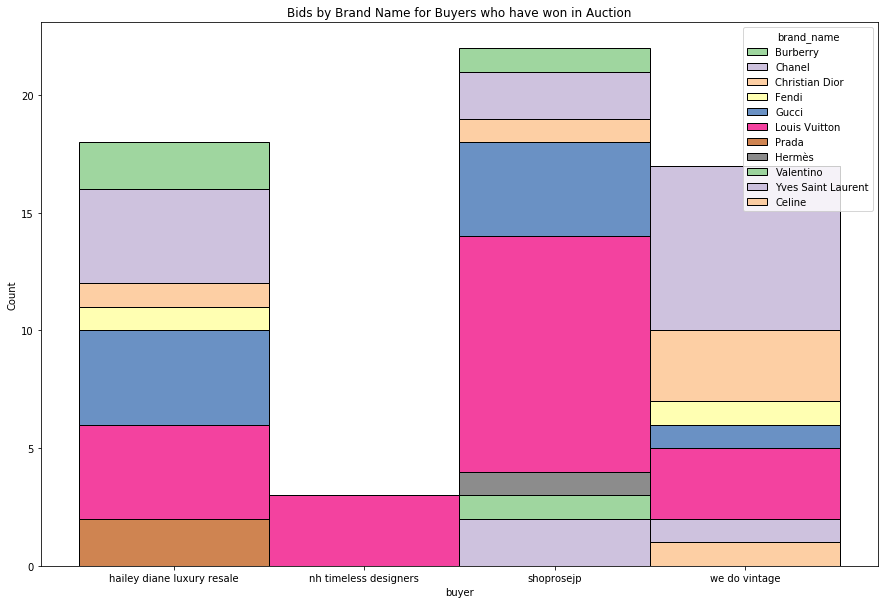

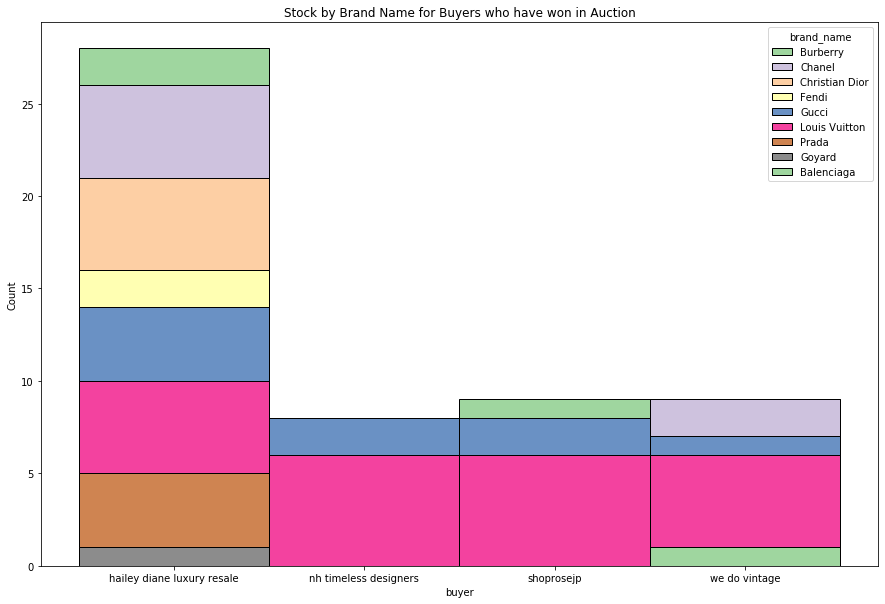

In [50]:
plt.figure(figsize=(15,10))
sns.histplot(x='buyer', data=brand_cat[brand_cat['buyer'].isin(list(win['buyer']))], hue='brand_name',
             multiple='stack', palette='Accent')
plt.title('Bids by Brand Name for Buyers who have won in Auction')
plt.show()

plt.figure(figsize=(15,10))
sns.histplot(x='buyer', data=brand_cat_s[brand_cat_s['buyer'].isin(list(win['buyer']))], hue='brand_name', 
             multiple='stack', palette='Accent',
             hue_order=['Burberry', 'Chanel', 'Christian Dior', 'Fendi', 'Gucci', 'Louis Vuitton', 'Prada',
                       'Goyard', 'Balenciaga'])
plt.title('Stock by Brand Name for Buyers who have won in Auction')
plt.show()

In [51]:
sr_b=all_bid[all_bid['buyer']=='shoprosejp']
sr_b.head()

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
51527,157,NaN,shoprosejp,1671597,Chanel,Crossbody Bags,"Quilted (bag), waist bag",C,849,566.29,913.0,2020-05-01 12:12:01,NaN,NaN,NaN,NaN,204639.0,N,Y
51572,157,NaN,shoprosejp,1670175,Louis Vuitton,Wallets,Portefeuille-Sarah Cocreco,A,325,109.45,NaN,2020-05-03 18:21:32,NaN,NaN,NaN,NaN,204639.0,N,N
51573,157,NaN,shoprosejp,1671931,Louis Vuitton,Wallets,Portefeuille Josephine,B,220,118.97,269.0,2020-05-03 18:28:10,NaN,NaN,NaN,NaN,204639.0,N,N
51574,157,NaN,shoprosejp,1669493,Louis Vuitton,Clutches,Trousse Makeup,C,240,166.56,NaN,2020-05-03 18:37:23,NaN,NaN,NaN,NaN,204639.0,N,N
51575,157,NaN,shoprosejp,1671433,Louis Vuitton,Wallets,Pochette cle,B,175,118.97,182.0,2020-05-03 18:38:32,NaN,NaN,NaN,NaN,204639.0,N,Y


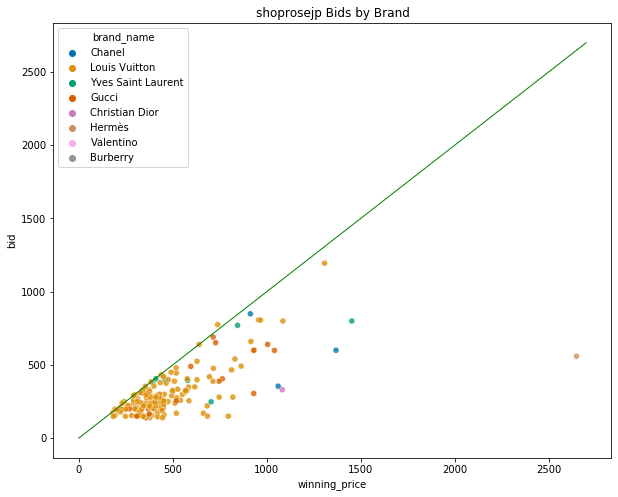

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=sr_b, hue='brand_name', alpha=0.8)
plt.plot([2700, 0], [2700, 0], linewidth=1, color='green')
plt.title('shoprosejp Bids by Brand')
plt.show()

In [53]:
sr_b[sr_b['win']=='Y']

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
51579,157,NaN,shoprosejp,1669319,Louis Vuitton,Totes,Neverfull MM,C,775,613.88,739.0,2020-05-03 19:59:55,NaN,NaN,NaN,NaN,204639.0,Y,Y
53032,163,NaN,shoprosejp,1703016,Louis Vuitton,Shoulder Bags,Turenne MM,C,640,304.11,640.0,2020-05-15 15:12:44,NaN,NaN,NaN,NaN,204639.0,Y,Y
54096,165,NaN,shoprosejp,1715565,Louis Vuitton,Wallets,M60707 Portefeuille Josephine,C,249,118.56,241.0,2020-05-22 22:14:24,NaN,NaN,NaN,NaN,204639.0,Y,Y
54101,165,NaN,shoprosejp,1716051,Louis Vuitton,Wallets,Portobier 6 Cartes Credit,C,198,137.53,193.0,2020-05-22 22:19:04,NaN,NaN,NaN,NaN,204639.0,Y,Y
61776,179,NaN,shoprosejp,1774019,Louis Vuitton,Wallets,Portefeuille Emilie,C,239,137.41,230.0,2020-07-03 16:45:41,NaN,NaN,NaN,NaN,204639.0,Y,Y
64477,186,NaN,shoprosejp,1800167,Louis Vuitton,Shoulder Bags,Ellipse MM,C,354,114.08,354.0,2020-07-18 20:22:12,NaN,NaN,NaN,NaN,204639.0,Y,Y
64482,186,NaN,shoprosejp,1799710,Louis Vuitton,Shoulder Bags,Ellipse PM,C,384,190.14,384.0,2020-07-18 20:34:30,NaN,NaN,NaN,NaN,204639.0,Y,Y
75312,201,NaN,shoprosejp,1886613,Louis Vuitton,Clutches,Louis Vuitton Monogram Eclipse Travel Pouch M6...,B,297,161.32,297.0,2020-09-14 20:55:40,NaN,NaN,NaN,NaN,204639.0,Y,Y


In [54]:
print('shoprosejp mean bid: ${:.2f}'.format(sr_b['bid'].mean()))

shoprosejp mean bid: $321.13


* Winning small items but just barely; most bids are not within 10%
* Lots of bids under $500 on LV small bags/wallets
* Losing by a lot on Chanel, LV, Dior, and Gucci

In [55]:
sr_s=all_stock[all_stock['buyer']=='shoprosejp']
sr_s.sort_values(by='submitted_date', ascending=False).head()

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
5693,camille+eLady_frontend,204684,shoprosejp,204639,2002483,Louis Vuitton Monogram Pochette Porte Monnaie ...,Louis Vuitton,Wallets,132.0,2021-01-09 17:53:00
3393,Camille+brandstreetTokyo,206687,shoprosejp,204639,1953900,Louis Vuitton LOUIS VUITTON Monogram Bifold Wa...,Louis Vuitton,Wallets,328.0,2020-10-15 09:42:00
3392,Next Innovation,198548,shoprosejp,204639,1955173,Louis Vuitton Monogram Neverfull GM Pouch,Louis Vuitton,Clutches,295.0,2020-10-15 09:32:00
2504,Next Innovation,198548,shoprosejp,204639,1881402,Louis Vuitton Monogram Portefeuille International,Louis Vuitton,Wallets,141.0,2020-09-11 01:32:00
2256,Next Innovation,198548,shoprosejp,204639,1870055,Gucci Clutch Bag PVC Brown,Gucci,Clutches,123.0,2020-09-01 14:03:00


In [56]:
print('shoprosejp mean stock purchase price: ${:.2f}'.format(sr_s['price'].mean()))

shoprosejp mean stock purchase price: $314.67


In [57]:
sr_s['title'].value_counts()

LOUIS VUITTON Orsay Second Pouch Clutch Bag Monogram               2
Louis Vuitton | Ellipse MM M51126, Monogram                        1
Louis Vuitton Koala  Damier Azur                                   1
Louis Vuitton Monogram Danube                                      1
Louis Vuitton Damier Neverfull GM Pouch                            1
Louis Vuitton Monogram Poche Toilette 19                           1
Louis Vuitton Monogram Poche Toilette 26                           1
Louis Vuitton LOUIS VUITTON Monogram Bifold Wallet                 1
Louis Vuitton Monogram Poche Toilette 15                           1
GUCCI Rucksack Rucksack Calf                                       1
Gucci Clutch Bag PVC Brown                                         1
Burberry Nova Handbag                                              1
Louis Vuitton Monogram Portefeuille International                  1
Louis Vuitton LOUIS VUITTON Damier Ebene Neverfull MM Pouch        1
Louis Vuitton | Neverfull GM Poche

In [58]:
sr_b['title'].value_counts()

Neverfull MM                                                              13
Orsay                                                                      8
Neverfull PM                                                               7
Neverfull MM, Damier Ebene                                                 6
Ellipse PM                                                                 6
                                                                          ..
Portefeuille Josephine                                                     1
Portefeuille Multiple                                                      1
Louis Vuitton Monogram Sac Plat M51140 MI0071                              1
Louis Vuitton Speedy HL, Monogram                                          1
 Hermès Kelly 32 Box calf Hand bag Black Gold Metal fittings ○ O: 1985     1
Name: title, Length: 154, dtype: int64

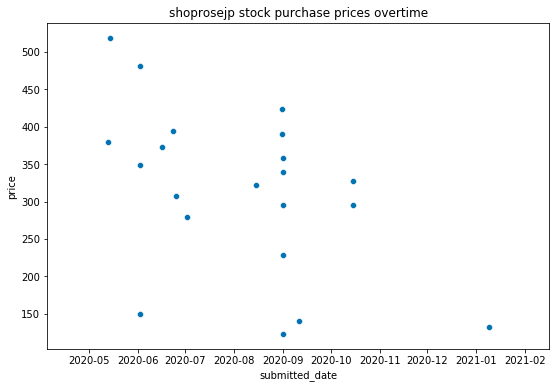

In [59]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=sr_s['submitted_date'].dt.date, y=sr_s['price'])
plt.title('shoprosejp stock purchase prices overtime')
plt.show()

## STOCK ONLY BUYERS WHO NEVER CAME BACK

In [60]:
new.loc[new['last_bid'].isnull(), 'tag']=2
stock_bye=new.loc[new['last_bid'].isnull()]
stock_bye.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent,user_id,email,first_purchase_date,last_activity,time_to_inactive,tag
0,agora vintage,34798.0,0.0,34798.0,2021-01-25,N,NaT,N,NaT,0,0,NaN,0,0,207275.0,agoravintage@gmail.com,2020-03-30,2021-01-25,301.0,2.0
1,revolve,31819.0,0.0,31819.0,2020-08-13,N,NaT,N,NaT,0,0,NaN,0,0,207173.0,merissa.ghezzi@revolve.com,2020-07-29,2020-08-13,15.0,2.0
4,fox & holly,26575.0,0.0,26575.0,2020-10-20,N,NaT,N,NaT,0,0,NaN,0,0,212796.0,sg@laceemail.com,2020-09-22,2020-10-20,28.0,2.0
9,dream furniture,10453.0,0.0,10453.0,2020-09-08,N,NaT,N,NaT,0,0,NaN,0,0,NaN,NaN,NaT,2020-09-08,NaN,2.0
11,onlyauthentics,10411.0,0.0,10411.0,2020-12-18,N,NaT,N,NaT,0,0,NaN,0,0,137571.0,concierge@onlyauthentics.com,2020-12-18,2020-12-18,0.0,2.0


TAG 2: Stock only buyers who stopped altogether

In [61]:
# stock_bye.to_excel('stock_bye.xlsx')

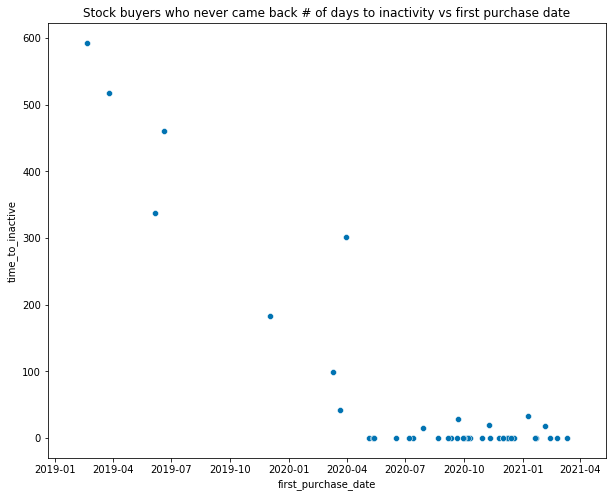

In [62]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='first_purchase_date', y='time_to_inactive', data=stock_bye, palette='rainbow_r')
plt.title('Stock buyers who never came back # of days to inactivity vs first purchase date')
plt.show()

In [63]:
stock_bye[stock_bye['first_purchase_date']>datetime.datetime(2020,1,1)]['time_to_inactive'].mean()

15.027027027027026

In [64]:
print('percent of buyers who only bought once: {:.2f}%'.format(100*stock_bye['time_to_inactive'].value_counts()[0]
                                                              /stock_bye.shape[0]))

percent of buyers who only bought once: 67.44%


In [65]:
stockbye_list=list(stock_bye['buyer'])
stockbye_s=all_stock[all_stock['buyer'].isin(stockbye_list)]

print('mean stock purchase price for this segment: ${:.2f}'.format(stockbye_s['price'].mean()))

mean stock purchase price for this segment: $631.13


In [66]:
stockbye_s[stockbye_s['price']<stockbye_s['price'].max()]['price'].describe()

count     261.000000
mean      593.655172
std       496.881579
min       107.000000
25%       316.000000
50%       481.000000
75%       676.000000
max      3800.000000
Name: price, dtype: float64

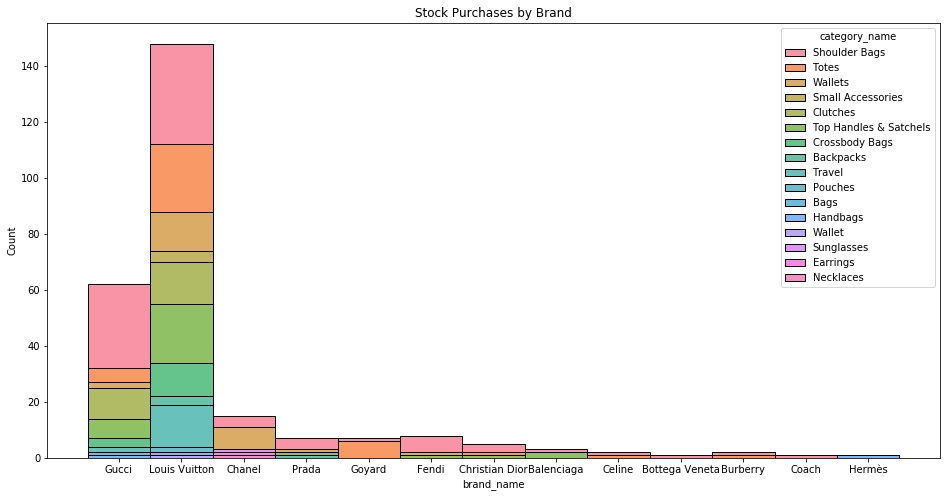

In [94]:
plt.figure(figsize=(16,8))
sns.histplot(x='brand_name', data=stockbye_s, hue='category_name', multiple='stack')
plt.title('Stock Purchases by Brand')
plt.show()

In [104]:
stockbye_s.groupby('buyer')['title'].value_counts()[:260]

buyer                       title                                               
agora vintage               Louis Vuitton Damier Neverfull MM                       3
                            Louis Vuitton Speedy 30, Monogram                       3
                            Gucci SherryLine Clutch Bag PVC Brown                   2
                            Louis Vuitton Keepall Bandouliere 55, Monogram          2
                            Louis Vuitton Monogram Neverfull MM                     2
                                                                                   ..
upcycled nyc                LOUIS VUITTON Leather Strap                             1
vlora x                     Louis Vuitton | Trousse Toilette 28, Monogram Canvas    1
walk in closet consignment  Louis Vuitton | Looping Gm, Monogram Canvas             1
                            Louis Vuitton | Sarah Wallet, Monogram Canvas           1
                            Louis Vuitton | Trousse Toilett

In [67]:
stockbye_s[stockbye_s['price']==stockbye_s['price'].max()]

,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
5093,BrandOff,202899,onlyauthentics,137571,2116387,Hermes Birkin 35 Handbag Gold SHW Togo Leather...,Hermès,Handbags,10411.0,2020-12-18 10:30:00


In [68]:
once_list=stockbye_s.groupby('buyer')['price'].count().sort_values(ascending=False)[-15:].index

In [69]:
av=stockbye_s[stockbye_s['buyer']=='agora vintage']
av_grp=av.groupby(av['submitted_date'].dt.date)['price'].sum()
av_grp

submitted_date
2020-05-21    1317.0
2020-05-26    2666.0
2020-05-27     163.0
2020-06-02    1820.0
2020-06-03    1819.0
2020-06-08    1594.0
2020-06-09    2775.0
2020-07-06    2662.0
2020-07-07    1665.0
2020-07-21    1480.0
2020-07-25    6787.0
2020-07-26    1718.0
2020-08-06    2396.0
2020-08-20     956.0
2020-08-24    1900.0
2020-10-05    1541.0
2021-01-25    1539.0
Name: price, dtype: float64

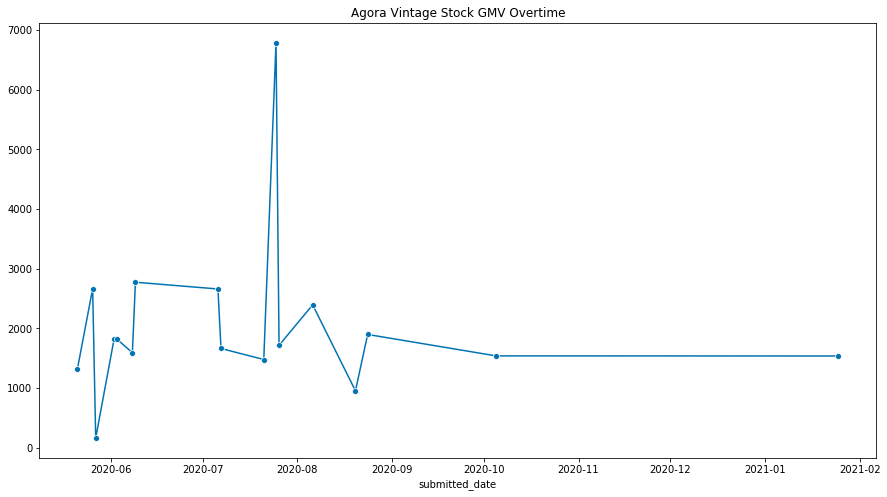

In [70]:
plt.figure(figsize=(15,8))
sns.lineplot(x=av_grp.index, y=list(av_grp), marker='o')
plt.title('Agora Vintage Stock GMV Overtime')
plt.show()

In [71]:
print('mean stock purchase price for agora vintage: ${:.2f}'.format(av['price'].mean()))

mean stock purchase price for agora vintage: $535.35


In [72]:
stockbye_s[stockbye_s['buyer'].isin(once_list)][['buyer','title','brand_name','price','submitted_date']].reset_index(drop=True)

,buyer,title,brand_name,price,submitted_date
0,trendz boutique,Gucci | Medium Abbey Shoulder Bag,Gucci,178.0,2020-05-02 11:22:00
1,divineconsignclt,Chanel New Travelline Shoulder Bag Beige,Chanel,615.0,2020-05-09 18:55:00
2,maison elite,"Louis Vuitton | Neverfull PM, Damier Azur",Louis Vuitton,674.0,2020-06-17 15:37:00
3,lady jeweler inc.,Louis Vuitton Monogram Neverfull MM,Louis Vuitton,810.0,2020-07-07 14:02:00
4,upcycled nyc,LOUIS VUITTON Leather Strap,Louis Vuitton,138.0,2020-09-06 23:16:00
5,dina c's fab & funky boutique,Prada Canapa Bucket Shoulder Bag Blue,Prada,361.0,2020-09-11 14:19:00
6,fnl exclusive,PRADA Card Case Card case Calf,Prada,157.0,2020-09-21 13:41:00
7,sky international usa,Louis Vuitton Saint Jacques Castilianred Epi ...,Louis Vuitton,365.0,2020-09-29 13:16:00
8,clothes mentor naples,"Pochette Accessoires, Monogram",Louis Vuitton,553.0,2020-10-02 13:56:00
9,the nm luxury shop,Chanel | Pile GWP Crossbody Bag,Chanel,233.0,2020-11-11 11:08:00


In [73]:
once_list

Index(['sky international usa', 'dina c's fab & funky boutique',
       'upcycled nyc', 'trendz boutique', 'clothes mentor naples',
       'the nm luxury shop', 'onlyauthentics', 'savvy consignment wv',
       'divineconsignclt', 'lady jeweler inc.', 'vlora x', 'fnl exclusive',
       's2s couture', 'maison elite', 'my designerly'],
      dtype='object', name='buyer')

## STOCK BUYERS WHO SWITCHED TO BIDDING

In [74]:
new.loc[new['last_stock']<new['last_bid'], 'tag']=3
stock_tobid=new.loc[new['last_stock']<new['last_bid']]
stock_tobid.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent,user_id,email,first_purchase_date,last_activity,time_to_inactive,tag
2,dlc,11906.0,18541.0,30447.0,2020-08-25,N,2020-08-31,N,2020-08-28,59,388,15.206186,9,55,194484.0,srd4181@gmail.com,2020-05-06,2020-08-31,117.0,3.0
3,uptown bombshell boutique,2748.0,26708.0,29456.0,2020-06-03,N,2020-08-02,N,2020-06-28,25,175,14.285714,15,36,210034.0,uptownbombshellboutique@gmail.com,2020-06-03,2020-08-02,60.0,3.0
7,authentic purse alberta,1519.0,9780.0,11299.0,2020-05-22,N,2020-10-20,N,2020-10-20,15,54,27.777778,10,14,203099.0,wilmel_blanco@yahoo.com,2019-09-26,2020-10-20,390.0,3.0
16,la esquina jewelers,1240.0,5740.0,6980.0,2020-05-26,N,2020-10-06,N,2020-08-24,21,135,15.555556,5,22,207525.0,davis8384@bellsouth.net,2020-03-24,2020-10-06,196.0,3.0
19,my closet rocks,5433.0,254.0,5687.0,2020-10-21,N,2020-11-12,N,2020-10-23,1,46,2.173913,0,2,193551.0,hello@myclosetrocks.com,2019-11-25,2020-11-12,353.0,3.0


TAG 3: Stock buyers who switched to bidding

In [75]:
# stock_tobid.to_excel('stock_tobid.xlsx')

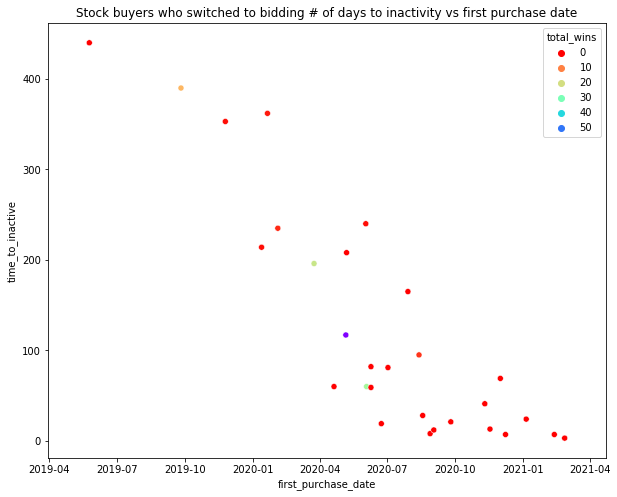

In [76]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='first_purchase_date', y='time_to_inactive', hue='total_wins', data=stock_tobid, palette='rainbow_r')
plt.title('Stock buyers who switched to bidding # of days to inactivity vs first purchase date')
plt.show()

In [77]:
stock_tobid[stock_tobid['first_purchase_date']>datetime.datetime(2020,1,1)]['time_to_inactive'].mean()

93.3076923076923

In [78]:
dlc_b=all_bid[all_bid['buyer']=='dlc']
dlc_b.shape

(388, 19)

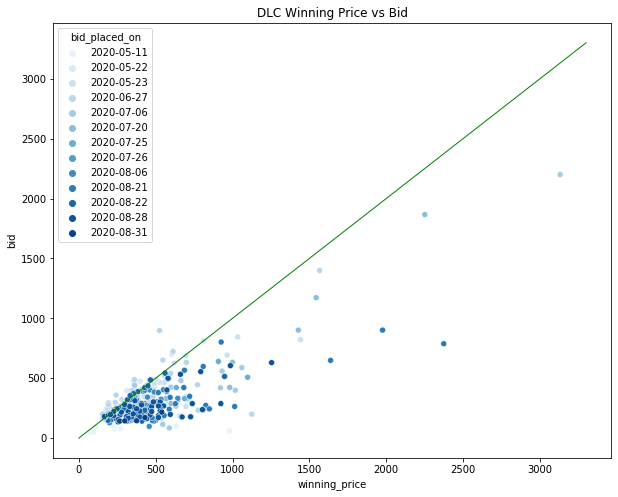

In [79]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=dlc_b['winning_price'], y=dlc_b['bid'], hue=dlc_b['bid_placed_on'].dt.date, palette='Blues')
plt.plot([3300, 0], [3300, 0], linewidth=1, color='green')
plt.title('DLC Winning Price vs Bid')
plt.show()

In [80]:
dlc_b[dlc_b['bid_placed_on'].dt.month==8].sort_values(by='bid_placed_on', ascending=False)['category_name'].value_counts()

Wallets              32
Watches              29
Shoulder Bags        27
Necklaces            26
Rings                23
Small Accessories    15
Totes                 8
Clutches              5
Bracelets             5
Scarves/Wraps         2
Belts                 2
Earrings              1
Sunglasses            1
Handbags              1
Gloves                1
Name: category_name, dtype: int64

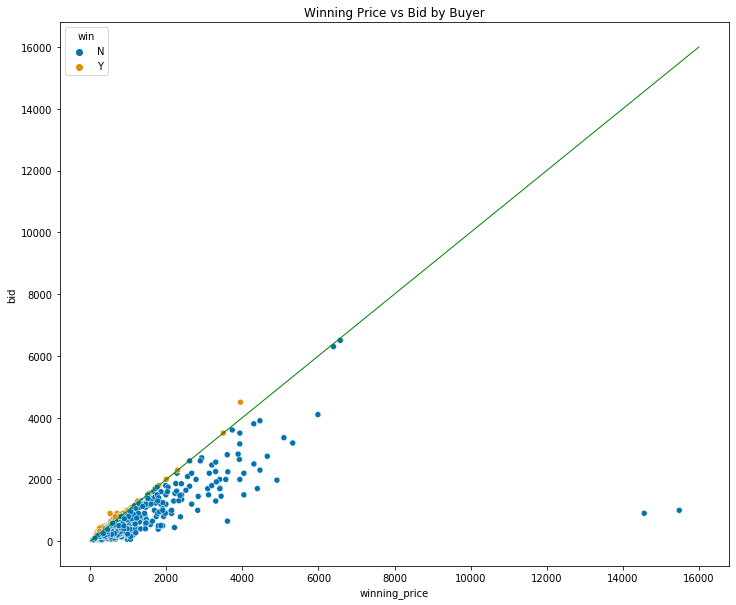

In [107]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='winning_price', y='bid', hue='win', data=all_bid[all_bid['buyer'].isin(list(stock_tobid.buyer))])
plt.plot([16000, 0], [16000, 0], linewidth=1, color='green')
plt.title('Winning Price vs Bid by Buyer')
plt.show()

In [82]:
ub_b=all_bid[all_bid['buyer']=='uptown bombshell boutique']
ub_b[ub_b['win']=='Y']

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
55874,170,NaN,uptown bombshell boutique,1736540,Louis Vuitton,Totes,Neverfull PM,S,1100,774.36,1099.0,2020-06-05 12:29:31,NaN,NaN,NaN,NaN,210034.0,Y,Y
55886,170,NaN,uptown bombshell boutique,1735876,Chanel,Crossbody Bags,"Quilted (bag), waist bag 0 series",C,1300,718.39,1248.0,2020-06-05 12:36:16,NaN,NaN,NaN,NaN,210034.0,Y,Y
55890,170,NaN,uptown bombshell boutique,1735593,Gucci,Shoulder Bags,499621 Ophidia unused,S,1000,671.74,992.0,2020-06-05 12:39:16,NaN,NaN,NaN,NaN,210034.0,Y,Y
55891,170,NaN,uptown bombshell boutique,1735589,Gucci,Shoulder Bags,499621 Ophidia unused,S,1000,671.74,992.0,2020-06-05 12:39:42,NaN,NaN,NaN,NaN,210034.0,Y,Y
57362,171,NaN,uptown bombshell boutique,1739677,Chanel,Shoulder Bags,Chanel Matelasse Caviarskin Chain wallet Black...,A,2000,1535.50,2000.0,2020-06-09 11:11:44,NaN,NaN,NaN,NaN,210034.0,Y,Y
57364,171,NaN,uptown bombshell boutique,1740162,Chanel,Shoulder Bags,Chanel Matelasse Caviarskin Chain wallet Pink ...,AB,1800,1330.77,1800.0,2020-06-09 11:12:52,NaN,NaN,NaN,NaN,210034.0,Y,Y
57365,171,NaN,uptown bombshell boutique,1740534,Chanel,Shoulder Bags,Chanel Boy Chanel Ram leather Chain wallet Red...,AB,1550,1126.03,1550.0,2020-06-09 11:13:24,NaN,NaN,NaN,NaN,210034.0,Y,Y
57368,171,NaN,uptown bombshell boutique,1739823,Gucci,Handbags,Gucci GG Marmont Canvas Shoulder bag Black 447632,A,900,460.65,854.0,2020-06-09 11:17:02,NaN,NaN,NaN,NaN,210034.0,Y,Y
57370,171,NaN,uptown bombshell boutique,1741720,Louis Vuitton,Backpacks,Louis Vuitton Damier Geronimos N51994 CA0013,B,450,225.21,450.0,2020-06-09 11:18:51,NaN,NaN,NaN,NaN,210034.0,Y,Y
57372,171,NaN,uptown bombshell boutique,1741613,Gucci,Backpacks,Gucci GG Supreme Sling backpack Beige 450946,A,650,255.92,569.0,2020-06-09 11:19:40,NaN,NaN,NaN,NaN,210034.0,Y,Y


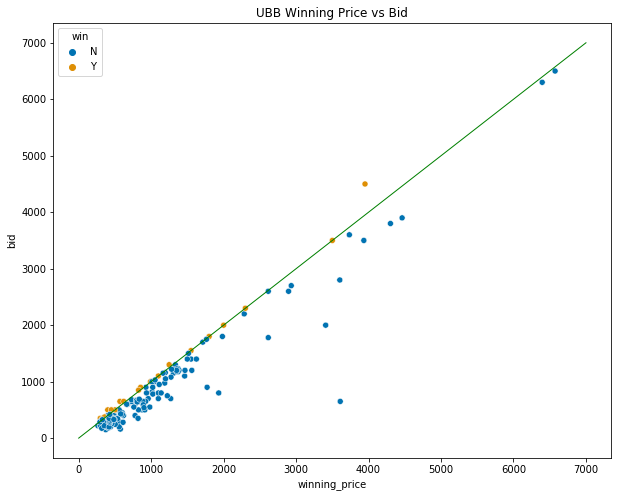

In [83]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=ub_b['winning_price'], y=ub_b['bid'], hue=ub_b['win'], palette='colorblind')
plt.plot([7000, 0], [7000, 0], linewidth=1, color='green')
plt.title('UBB Winning Price vs Bid')
plt.show()